In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Import Data

In [3]:
!wget https://lazyprogrammer.me/course_files/exercises/diabetes.csv

--2025-06-16 16:34:53--  https://lazyprogrammer.me/course_files/exercises/diabetes.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/csv]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2025-06-16 16:34:53 (146 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [4]:
# create panda dataframe from csv
df = pd.read_csv('diabetes.csv')
print('keywords:\n', np.array([df.keys()]).T)
print(f'shape:\tN={df.shape[0]} rows (samples) by D={df.shape[1] - 1} cols (dimensions)')

keywords:
 [['Pregnancies']
 ['Glucose']
 ['BloodPressure']
 ['SkinThickness']
 ['Insulin']
 ['BMI']
 ['DiabetesPedigreeFunction']
 ['Age']
 ['Outcome']]
shape:	N=768 rows (samples) by D=8 cols (dimensions)


In [5]:
# visualize as an interactive Google sheet (optional)
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1u2nlDbINZn3mXfFYPazUeUOE4Jl5tNUymd-_BmLxpbM/edit#gid=0


In [6]:
df = df.to_numpy()
X = df[:, :-1]
Y = df[:, -1].reshape(-1, 1) # convert 1D to 2D array

# 2. Prepare data for PyTorch

## 2.1. Separate intro train and test sets

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y,
    test_size = 0.33
)

## 2.2. Standardization

We first scale the train set, and then apply the same transformation to the test set.

In [8]:
# standardize the data
scaler = StandardScaler()
# we scale the train set
Xtrain = scaler.fit_transform(Xtrain)
# then apply the same transformation to the test set
Xtest = scaler.transform(Xtest)

## 2.3. Convert to torch tensor

In [9]:
Xtr = torch.from_numpy(Xtrain).type(torch.float)
Ytr = torch.from_numpy(Ytrain).type(torch.float)
Xte = torch.from_numpy(Xtest).type(torch.float)
Yte = torch.from_numpy(Ytest).type(torch.float)

# 3. Create the model

In [10]:
N, D = Xtr.shape

# model = nn.Sequential(
#    nn.Linear(D, 1),
#    nn.Sigmoid()
#)

# better way: with logits!
model = nn.Linear(D, 1)

## 3.1. Set the criterion and optimizer

In [11]:
# criterion = nn.BCELoss()  # binary cross entropy loss
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

## 3.2. Train the model

In [12]:
epochs = 5000
losses_tr = np.zeros(epochs)
losses_te = np.zeros(epochs)
acc_train = np.zeros(epochs)
acc_test = np.zeros(epochs)

for i in range(epochs):
    # initialize the gradients to zero
    optimizer.zero_grad()
    # forward pass
    outs = model(Xtr)
    train_loss = criterion(outs, Ytr)
    # gradient descent
    train_loss.backward()
    optimizer.step()

    # now we calculate the test loss
    out_test = model(Xte)
    test_loss = criterion(out_test, Yte)

    # we store the losses
    losses_tr[i] = train_loss.item()
    losses_te[i] = test_loss.item()

    # now we compute the accuracies
    with torch.no_grad():
        p_train = model(Xtr)
        p_train = (p_train.numpy() > 0)
        acc_train[i] = np.mean(Ytr.numpy() == p_train)
        p_test = model(Xte)
        p_test = (p_test.numpy() > 0)
        acc_test[i] = np.mean(Yte.numpy() == p_test)

    if i % 100 == 0:
        print(f'epoch {i+1}/{epochs}\t\ttrain_loss: {train_loss.item():.3f}\ttest_loss: {test_loss.item():.3f}',
            f'\n\t\t\ttrain_acc: {acc_train[i]:.3f}\ttest acc: {acc_test[i]:.3f}\n')

epoch 1/5000		train_loss: 0.653	test_loss: 0.672 
			train_acc: 0.679	test acc: 0.630

epoch 101/5000		train_loss: 0.594	test_loss: 0.614 
			train_acc: 0.718	test acc: 0.673

epoch 201/5000		train_loss: 0.558	test_loss: 0.575 
			train_acc: 0.733	test acc: 0.732

epoch 301/5000		train_loss: 0.535	test_loss: 0.551 
			train_acc: 0.749	test acc: 0.728

epoch 401/5000		train_loss: 0.518	test_loss: 0.534 
			train_acc: 0.759	test acc: 0.736

epoch 501/5000		train_loss: 0.506	test_loss: 0.521 
			train_acc: 0.759	test acc: 0.748

epoch 601/5000		train_loss: 0.497	test_loss: 0.511 
			train_acc: 0.765	test acc: 0.748

epoch 701/5000		train_loss: 0.490	test_loss: 0.503 
			train_acc: 0.768	test acc: 0.740

epoch 801/5000		train_loss: 0.485	test_loss: 0.497 
			train_acc: 0.772	test acc: 0.732

epoch 901/5000		train_loss: 0.481	test_loss: 0.493 
			train_acc: 0.774	test acc: 0.740

epoch 1001/5000		train_loss: 0.478	test_loss: 0.490 
			train_acc: 0.778	test acc: 0.740

epoch 1101/5000		train

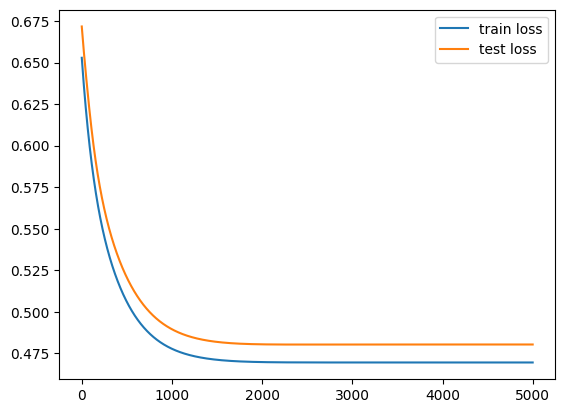

In [13]:
plt.plot(losses_tr, label='train loss')
plt.plot(losses_te, label='test loss')
plt.legend();

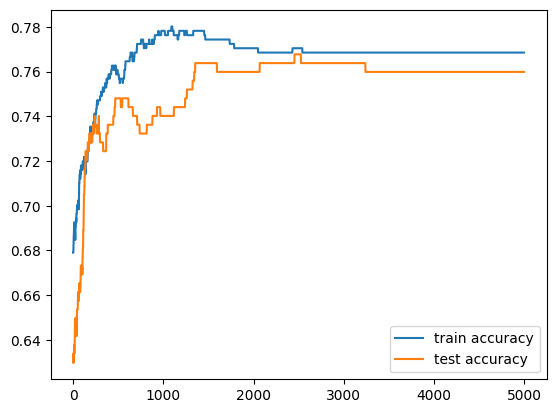

In [14]:
plt.plot(acc_train, label='train accuracy')
plt.plot(acc_test, label='test accuracy')
plt.legend();

# 4. Save, load and download model

In [15]:
# look at the state dict
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.3405,  1.1349, -0.2250,  0.1005, -0.0754,  0.6184,  0.2389,  0.2630]])),
             ('bias', tensor([-0.8982]))])

In [16]:
# save the model
torch.save(model.state_dict(), 'predict_diabetes.pt')

In [17]:
!ls

diabetes.csv  predict_diabetes.pt  sample_data


In [18]:
# load the model
#model2 = nn.Sequential(
#    nn.Linear(D, 1),
#    nn.Sigmoid()
#)
#model2.load_state_dict(torch.load('predict_diabetes.pt'))

In [19]:
#from google.colab import files
#files.download('predict_diabetes.pt')